In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('/content/sales_pipeline.csv')
df.shape

(8800, 8)

In [3]:
df["deal_stage"].value_counts()
df[df['deal_stage'] == "Won"].head(20)


,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0
5,ZNBS69V1,Anna Snelling,MG Special,Ron-tech,Won,2016-10-29,2017-03-01,49.0
6,9ME3374G,Vicki Laflamme,MG Special,J-Texon,Won,2016-10-30,2017-03-02,57.0
7,7GN8Q4LL,Markita Hansen,GTX Basic,Cheers,Won,2016-11-01,2017-03-07,601.0
8,OLK9LKZB,Niesha Huffines,GTX Plus Basic,Zumgoity,Won,2016-11-01,2017-03-03,1026.0
10,NL3JZH1Z,Anna Snelling,MG Special,Bioholding,Won,2016-11-04,2017-03-10,53.0


In [4]:
#Check null values in
df.isnull().sum()

,0
opportunity_id,0
sales_agent,0
product,0
account,1425
deal_stage,0
engage_date,500
close_date,2089
close_value,2089


In [5]:
df["account"] = df["account"].fillna("not given")
df["engage_date"] = pd.to_datetime(df["engage_date"])
df["close_date"] = pd.to_datetime(df["close_date"])
df['close_value'] = df['close_value'].fillna(0)
#Check null values in
df.isnull().sum()

,0
opportunity_id,0
sales_agent,0
product,0
account,0
deal_stage,0
engage_date,500
close_date,2089
close_value,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   opportunity_id  8800 non-null   object        
 1   sales_agent     8800 non-null   object        
 2   product         8800 non-null   object        
 3   account         8800 non-null   object        
 4   deal_stage      8800 non-null   object        
 5   engage_date     8300 non-null   datetime64[ns]
 6   close_date      6711 non-null   datetime64[ns]
 7   close_value     8800 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 550.1+ KB


In [14]:
df["close_value"] = df["close_value"].astype(int)

In [17]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   opportunity_id  8800 non-null   object        
 1   sales_agent     8800 non-null   object        
 2   product         8800 non-null   object        
 3   account         8800 non-null   object        
 4   deal_stage      8800 non-null   object        
 5   engage_date     8300 non-null   datetime64[ns]
 6   close_date      6711 non-null   datetime64[ns]
 7   close_value     8800 non-null   int64         
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 550.1+ KB


# **Exploratary Data Analysis**

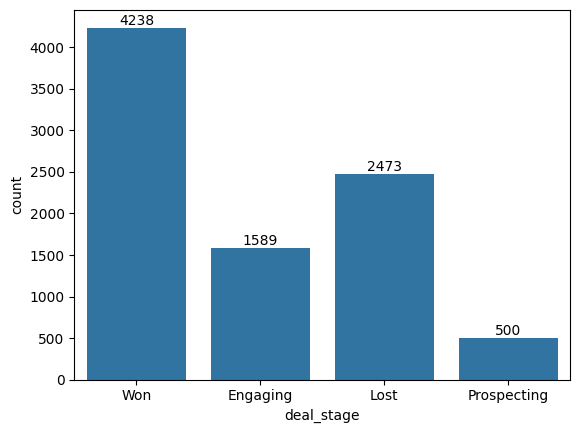

In [19]:
ax = sns.countplot(x="deal_stage", data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [30]:
#Show close values for each agent

agent_close_value = df.groupby(['sales_agent'])['close_value'].sum().sort_values(ascending=False)
agent_opportunity_count = df.groupby(['sales_agent'])['opportunity_id'].count().sort_values(ascending=False)

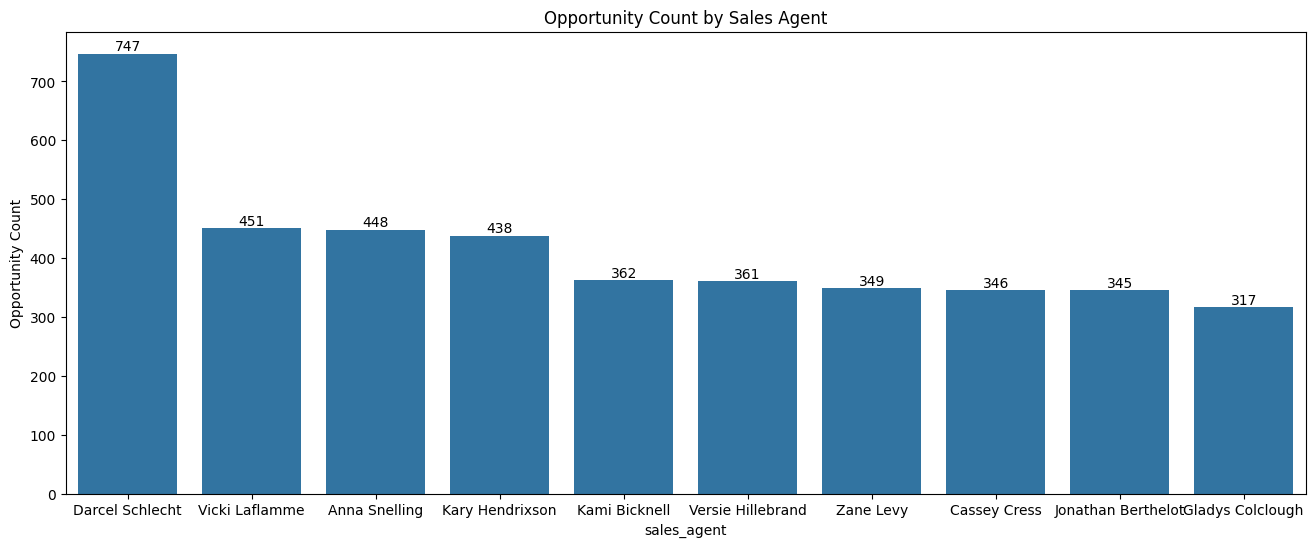

In [49]:

plt.figure(figsize=(16, 6))
ax = sns.barplot(x=agent_opportunity_count.head(10).index, y=agent_opportunity_count.head(10).values)
plt.ylabel("Opportunity Count")
plt.title("Opportunity Count by Sales Agent")
ax.bar_label(bars)
plt.show()


***From above graph we can say Darcel Schlect got the highest opportunities***

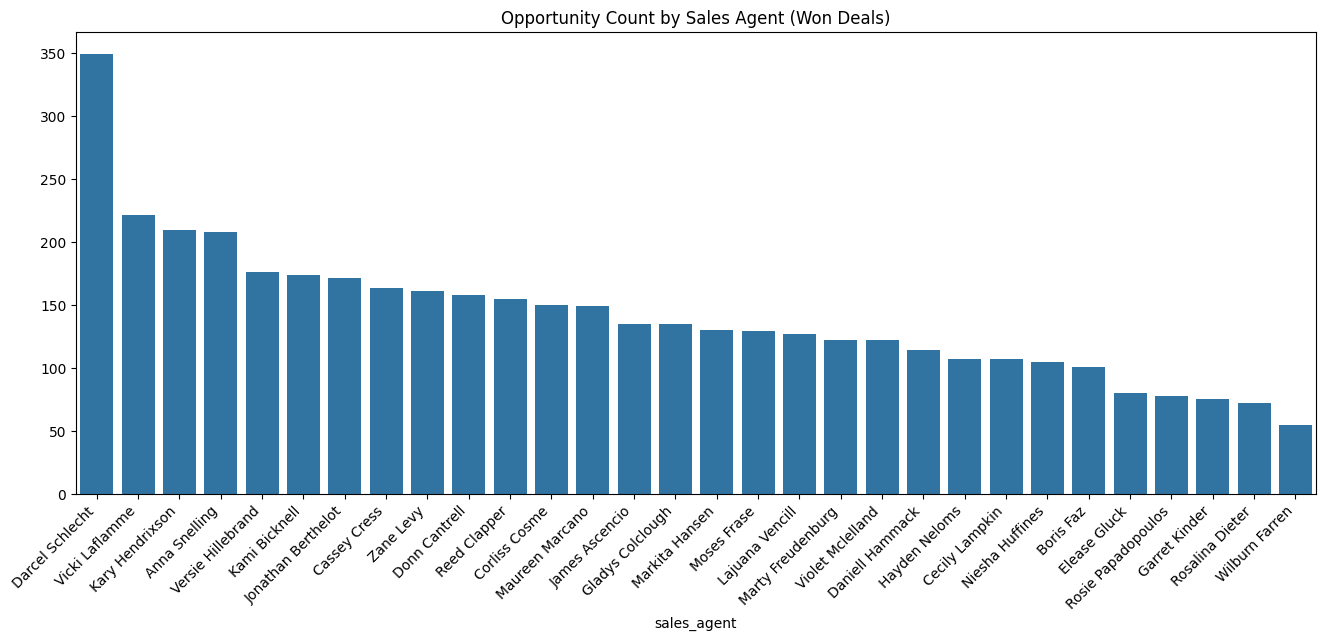

In [67]:

won_df = df[df['deal_stage'] == 'Won']
agent_opportunity_count = won_df.groupby(['sales_agent'])['opportunity_id'].count().sort_values(ascending=False)

plt.figure(figsize=(16, 6))
ax = sns.barplot(x=agent_opportunity_count.index, y=agent_opportunity_count.values)
ax.bar_label(bars)
plt.title("Opportunity Count by Sales Agent (Won Deals)")
plt.xticks(rotation=45, ha='right')
plt.show()


In [68]:
df['product'].value_counts()

,count
product,
GTX Basic,1866
MG Special,1651
GTXPro,1480
MG Advanced,1412
GTX Plus Basic,1383
GTX Plus Pro,968
GTK 500,40


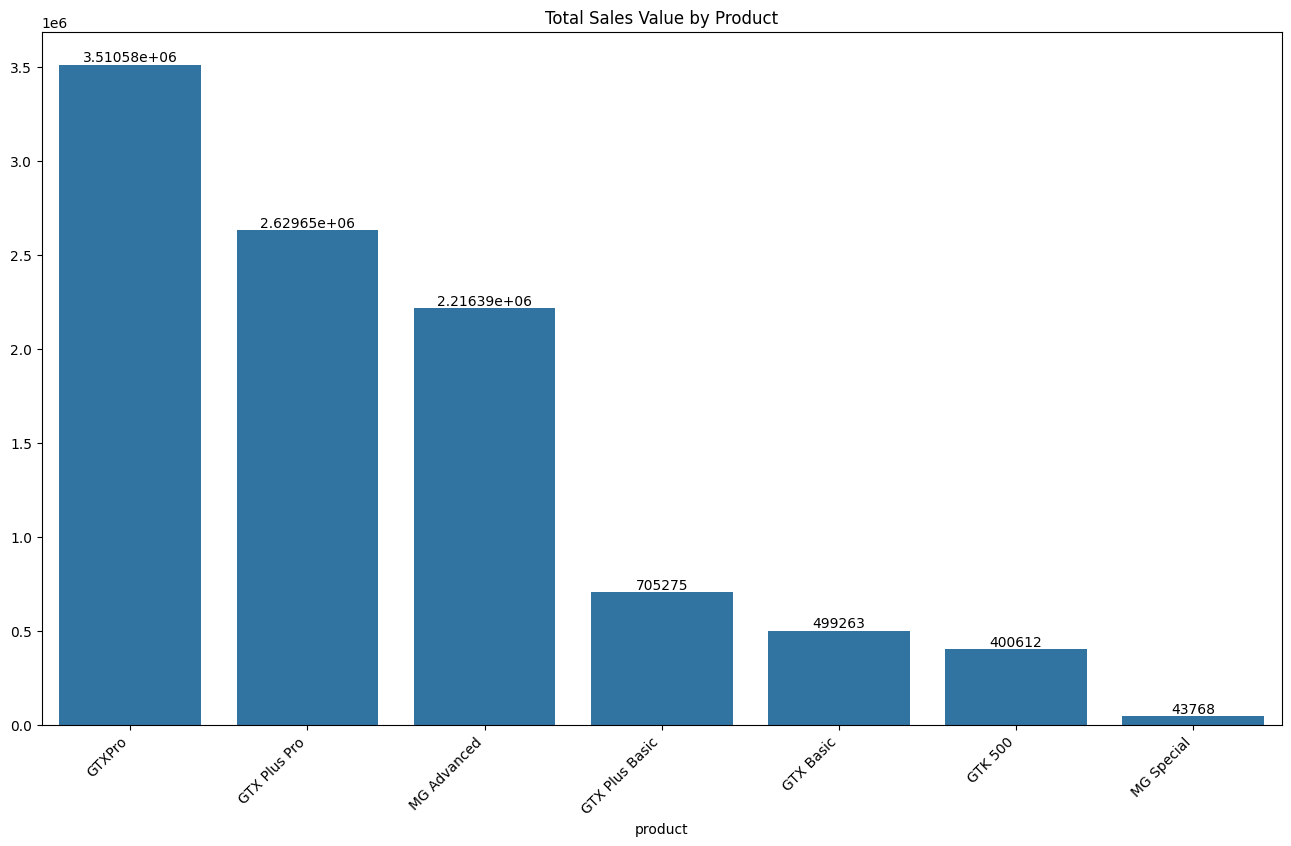

In [79]:
product_sales = df.groupby('product')['close_value'].sum().sort_values(ascending=False)
plt.figure(figsize=(16, 9))
ax = sns.barplot(x=product_sales.index, y=product_sales.values)
plt.title("Total Sales Value by Product")
plt.xticks(rotation=45, ha='right')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()


***From above graph we can see GTXPRO got the highest sales value***

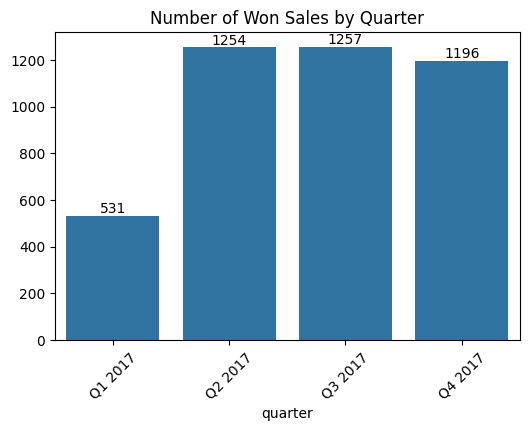

In [87]:
#plt.tight_layout()

df['quarter'] = df['close_date'].dt.to_period('Q').dt.strftime('Q%q %Y')
won_df = df[df['deal_stage'] == 'Won']
won_by_quarter = won_df.groupby('quarter')['deal_stage'].count()

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=won_by_quarter.index, y=won_by_quarter.values)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Number of Won Sales by Quarter')
plt.xticks(rotation=45)
plt.show()


***Above graph shows in the year of 2017 Q3  has the highes won sales***